## Data Cleaning Pipeline
Load the data and apply the cleaning functions to identify and fix issues.

## Imports

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
#import ace_tools as tools
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_cleaning import (
    load_data, drop_index_column, report_missing_values,
    report_extreme_cycle_values,
    convert_booleans, check_inconsistent_labels,plot_distributions, plot_barplots
)


## Load the Dataset

In [12]:
df = load_data('../data/raw/ncdatachallenge-2021-v1.csv')
df = drop_index_column(df)
df.head()

INFO: 'Unnamed: 0' column dropped.


,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency
0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000
1,19.886054,34,NaN,NaN,University,NaN,7,pregnant,0.009569,30.875000,3.522884,True,0.052632
2,29.323049,41,SE,"No, never",University,Several times during the night,4,not_pregnant,0.298246,27.666667,2.503331,True,0.149123
3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833
4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902


In [4]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(df.dtypes)

Number of rows: 1995
Number of columns: 13
bmi                      float64
age                        int64
country                   object
been_pregnant_before      object
education                 object
sleeping_pattern          object
n_cycles_trying            int64
outcome                   object
dedication               float64
average_cycle_length     float64
cycle_length_std         float64
regular_cycle             object
intercourse_frequency    float64
dtype: object


In [5]:
report_missing_values(df)

INFO: Missing values per column:
{'bmi': {'missing_count': 0, 'missing_pct': 0.0}, 'age': {'missing_count': 0, 'missing_pct': 0.0}, 'country': {'missing_count': 113, 'missing_pct': 5.66}, 'been_pregnant_before': {'missing_count': 317, 'missing_pct': 15.89}, 'education': {'missing_count': 391, 'missing_pct': 19.6}, 'sleeping_pattern': {'missing_count': 499, 'missing_pct': 25.01}, 'n_cycles_trying': {'missing_count': 0, 'missing_pct': 0.0}, 'outcome': {'missing_count': 0, 'missing_pct': 0.0}, 'dedication': {'missing_count': 0, 'missing_pct': 0.0}, 'average_cycle_length': {'missing_count': 6, 'missing_pct': 0.3}, 'cycle_length_std': {'missing_count': 25, 'missing_pct': 1.25}, 'regular_cycle': {'missing_count': 6, 'missing_pct': 0.3}, 'intercourse_frequency': {'missing_count': 0, 'missing_pct': 0.0}}


,missing_count,missing_pct
bmi,0,0.00
age,0,0.00
country,113,5.66
been_pregnant_before,317,15.89
education,391,19.60
sleeping_pattern,499,25.01
n_cycles_trying,0,0.00
outcome,0,0.00
dedication,0,0.00
average_cycle_length,6,0.30


In [6]:
df.describe(percentiles=[0.05, 0.25, 0.75])

,bmi,age,n_cycles_trying,dedication,average_cycle_length,cycle_length_std,intercourse_frequency
count,1995.000000,1995.000000,1995.000000,1995.000000,1989.000000,1970.000000,1995.000000
mean,23.357643,31.898747,4.725815,0.475641,30.530185,4.465253,0.106986
std,4.982275,4.063534,4.600871,0.335528,7.010407,8.675280,0.105248
min,0.000000,19.000000,1.000000,0.000000,19.500000,0.000000,0.000000
5%,18.519846,25.000000,1.000000,0.000000,25.125000,1.000000,0.000000
25%,20.708276,29.000000,1.000000,0.132567,27.176471,1.718249,0.020000
50%,22.530864,32.000000,3.000000,0.505415,29.000000,2.542727,0.080214
75%,25.303154,35.000000,6.000000,0.780816,31.666667,4.272002,0.162195
max,50.611299,44.000000,26.000000,1.347826,145.500000,168.998521,0.793103


In [7]:
report_extreme_cycle_values(df)

INFO: Cycles > 100 days: 3 rows.
INFO: Cycle std > 100 days: 3 rows.


In [8]:
inconsistencies = check_inconsistent_labels(df)
for col, values in inconsistencies.items():
    print(f"{col}: {values}")

country: ['AE', 'AO', 'AR', 'AT', 'AU', 'BE', 'BR', 'CA', 'CH', 'CL', 'DE', 'DK', 'EE', 'ES', 'FI', 'FO', 'FR', 'GB', 'HU', 'IE', 'IL', 'IS', 'KE', 'MT', 'MY', 'NL', 'NO', 'NZ', 'PL', 'PT', 'SE', 'SI', 'US', 'ZA']
been_pregnant_before: ['No, never', 'Yes 3 times or more', 'Yes, once', 'Yes, twice']
education: ['Elementary school', 'High school', 'PhD', 'Trade/technical/vocational training', 'University']
sleeping_pattern: ['Late and snoozer', 'Several times during the night', 'Shift worker', 'Wake same every day', 'Wake same every workday']
outcome: ['not_pregnant', 'pregnant']
regular_cycle: [False, True]


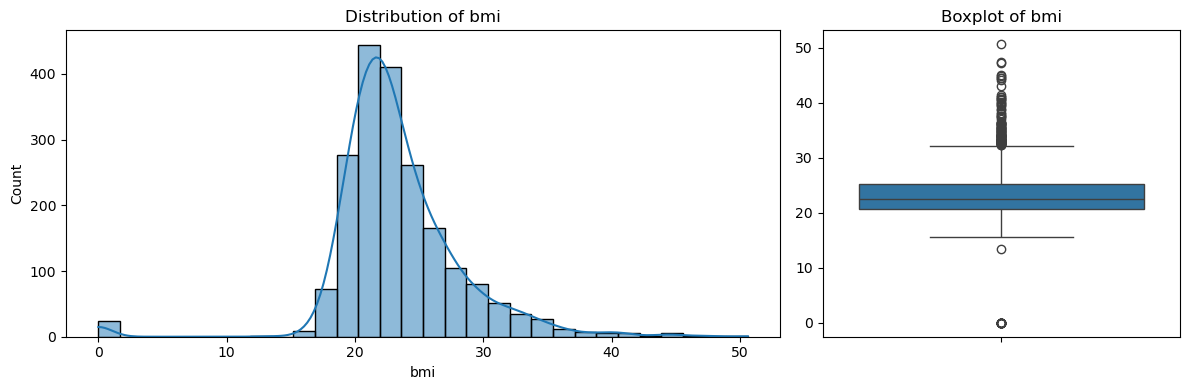

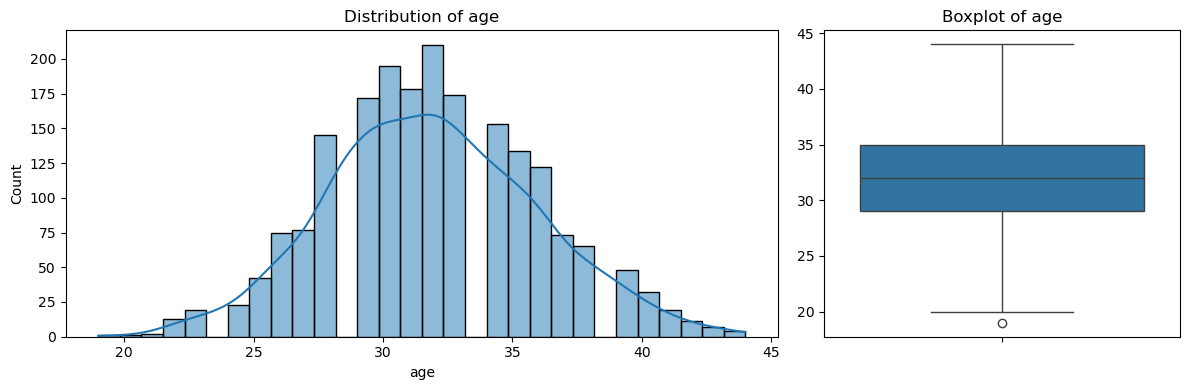

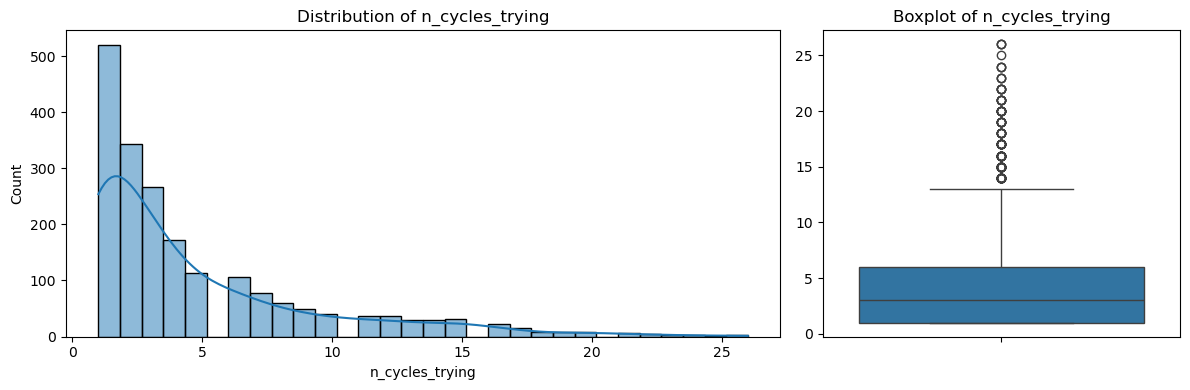

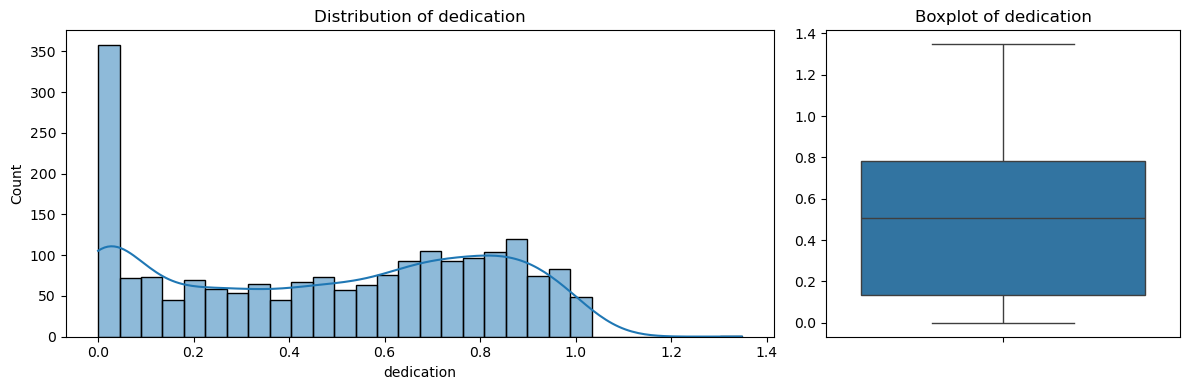

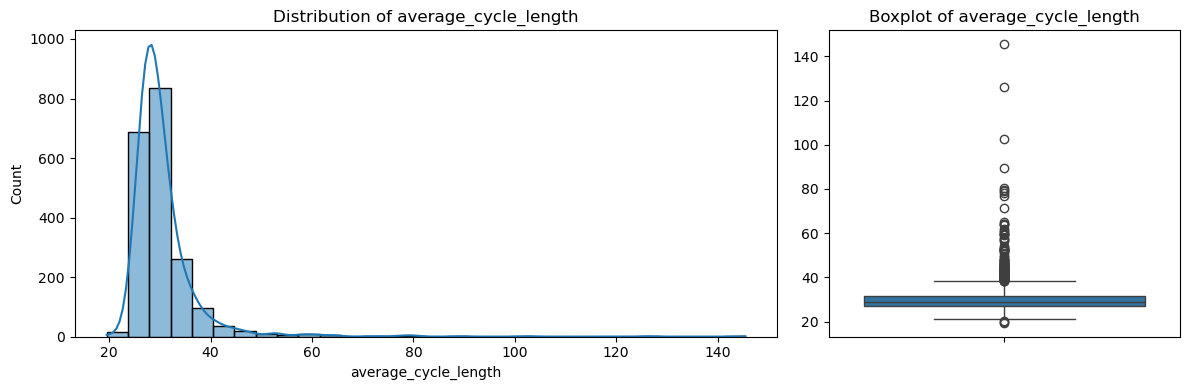

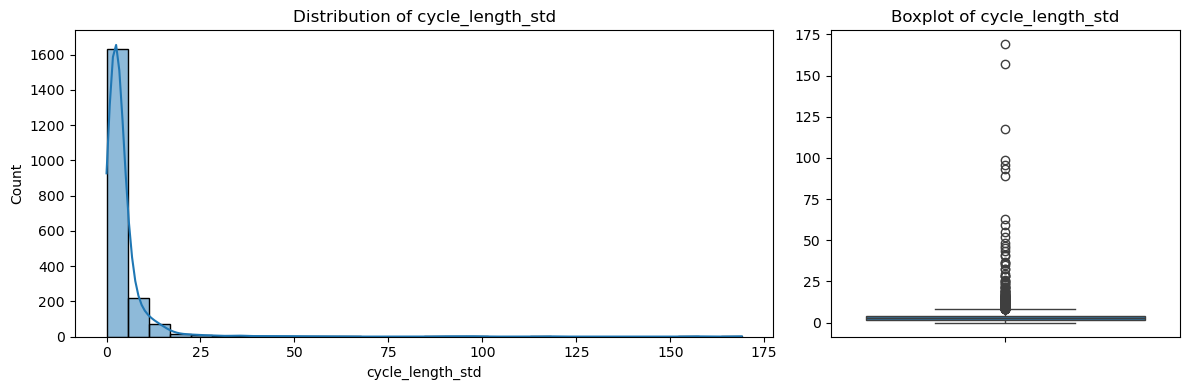

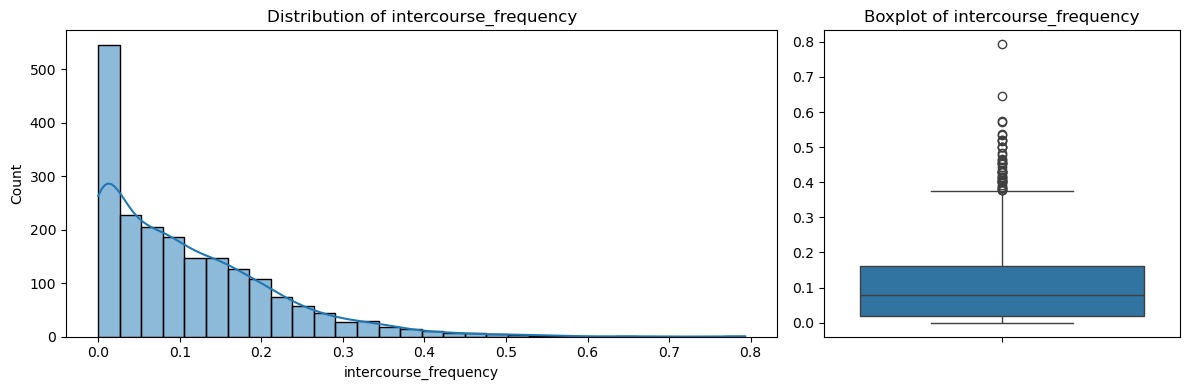

In [9]:
plot_distributions(df)

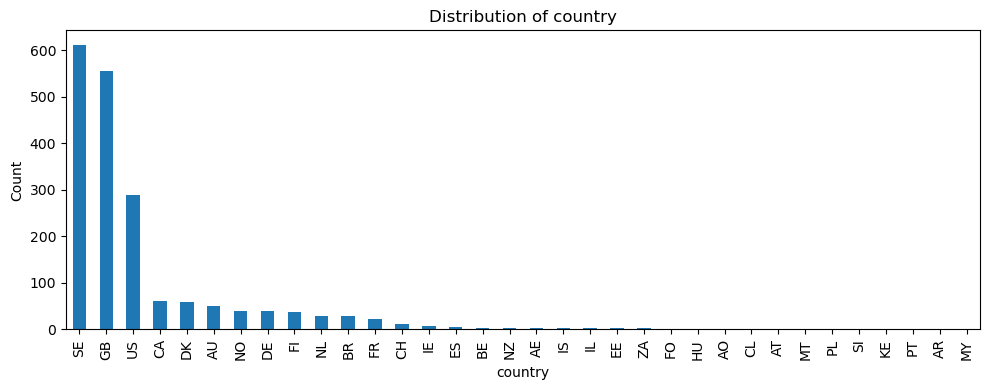

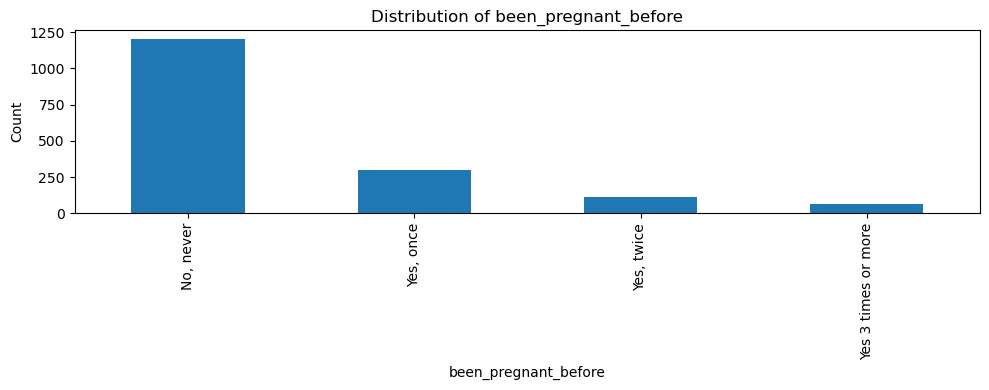

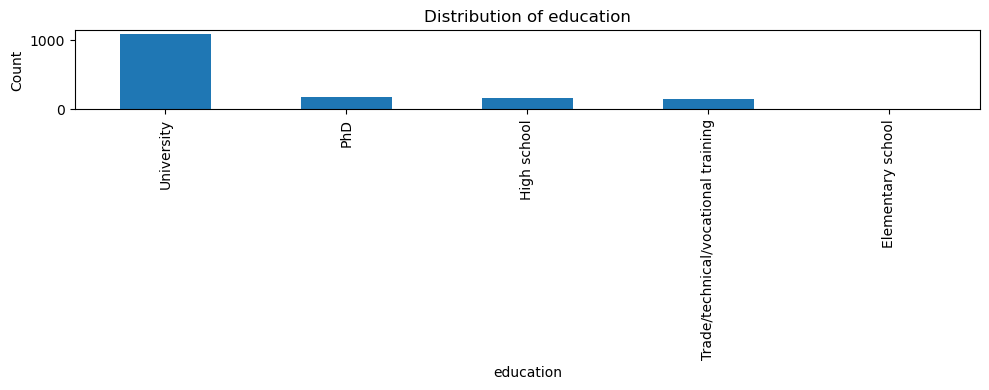

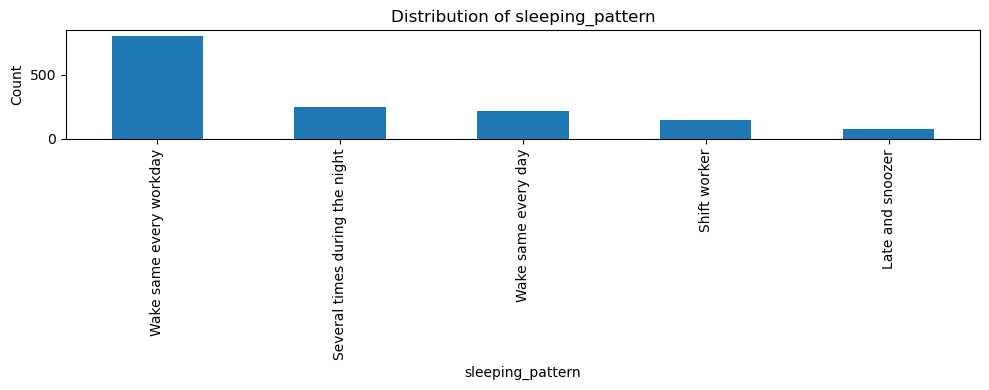

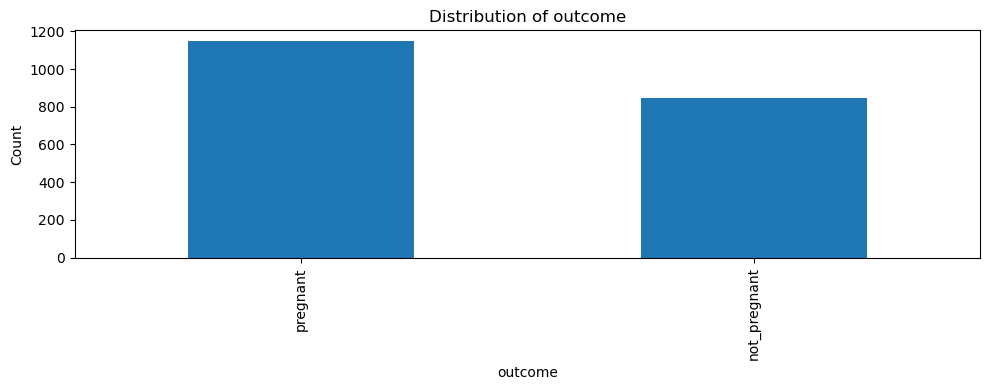

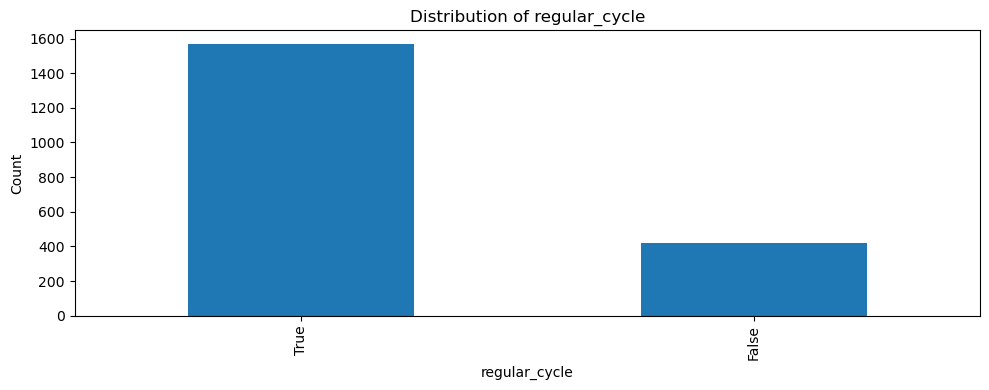

In [13]:
plot_barplots(df)